In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm 
import scipy.stats as stats

In [4]:
data_bnb = pd.read_csv(r'C:\Users\LEGION\Downloads\BNB-Historical-Data (1).csv')
data_bnb

,Date,Price,Open,High,Low,Vol.,Change %
0,06/01/2024,601.80,593.80,608.19,593.20,161.02K,1.35%
1,05/31/2024,593.80,594.99,598.89,590.10,175.98K,-0.20%
2,05/30/2024,594.99,595.69,601.80,586.60,233.89K,-0.10%
3,05/29/2024,595.59,601.69,603.59,593.29,219.96K,-1.01%
4,05/28/2024,601.69,603.80,605.48,594.29,294.76K,-0.35%
...,...,...,...,...,...,...,...
1915,03/05/2019,13.65,11.40,13.74,11.40,8.34M,19.61%
1916,03/04/2019,11.41,11.45,11.51,10.88,2.74M,-0.29%
1917,03/03/2019,11.45,11.75,11.86,11.20,2.86M,-2.58%
1918,03/02/2019,11.75,11.35,11.80,10.83,3.89M,3.56%


In [5]:

# Convert the 'Date' column to datetime format
data_bnb['Date'] = pd.to_datetime(data_bnb['Date'])
data_bnb=data_bnb.set_index('Date')

# Set the 'Date' column as the index value
data_bnb.drop(['Open'], axis=1, inplace=True)
data_bnb.drop('High', axis=1, inplace=True)
data_bnb.drop('Low', axis=1, inplace=True)
data_bnb.drop('Vol.', axis=1, inplace=True)
data_bnb.drop('Change %', axis=1, inplace=True)
data_bnb.head


<bound method NDFrame.head of              Price
Date              
2024-06-01  601.80
2024-05-31  593.80
2024-05-30  594.99
2024-05-29  595.59
2024-05-28  601.69
...            ...
2019-03-05   13.65
2019-03-04   11.41
2019-03-03   11.45
2019-03-02   11.75
2019-03-01   11.35

[1920 rows x 1 columns]>

<Figure size 2000x800 with 0 Axes>

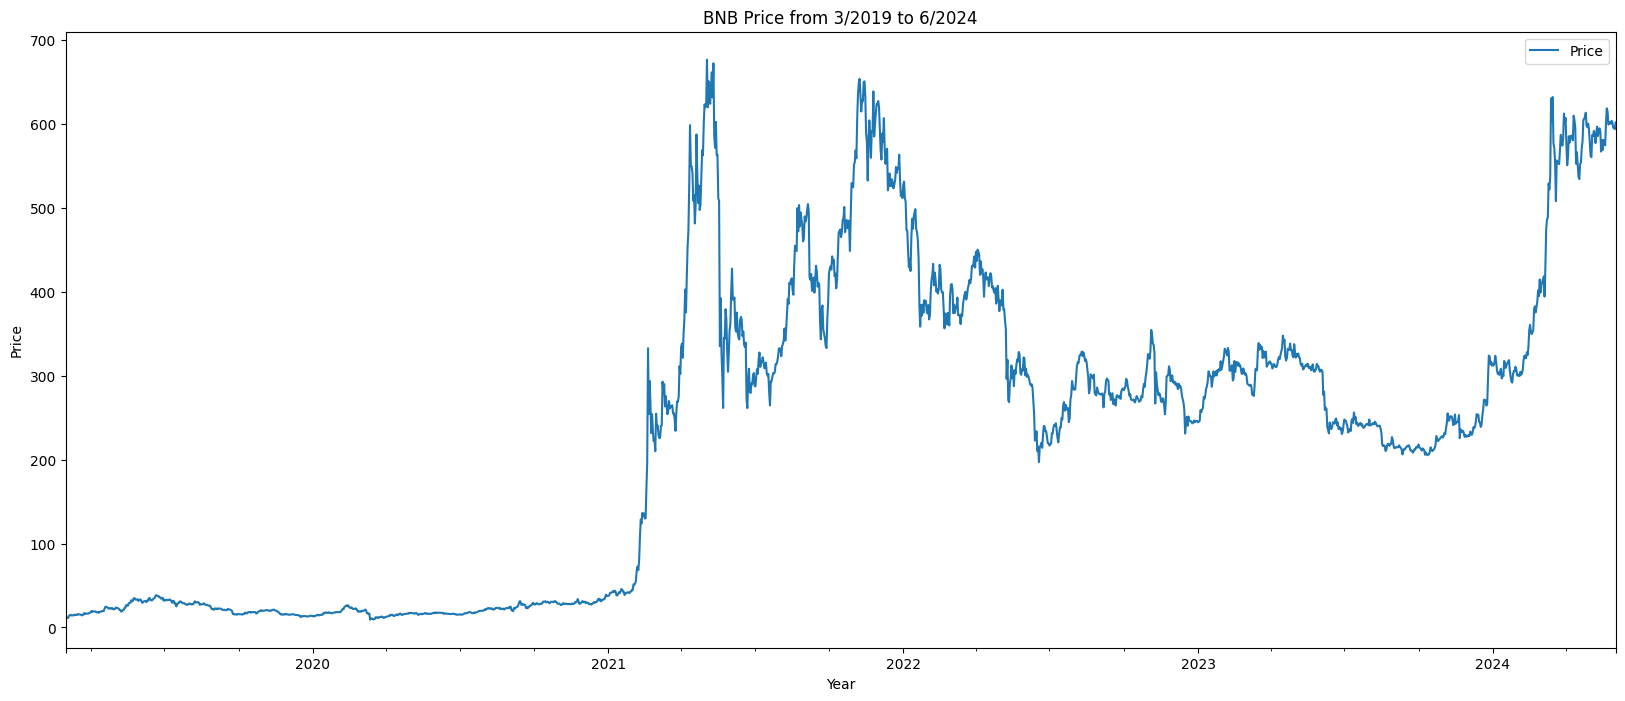

In [7]:
# Plot the BNB prices over time
plt.figure(figsize=(20,8))
data_bnb.plot(figsize=(20,8))
plt.title('BNB Price from 3/2019 to 6/2024')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

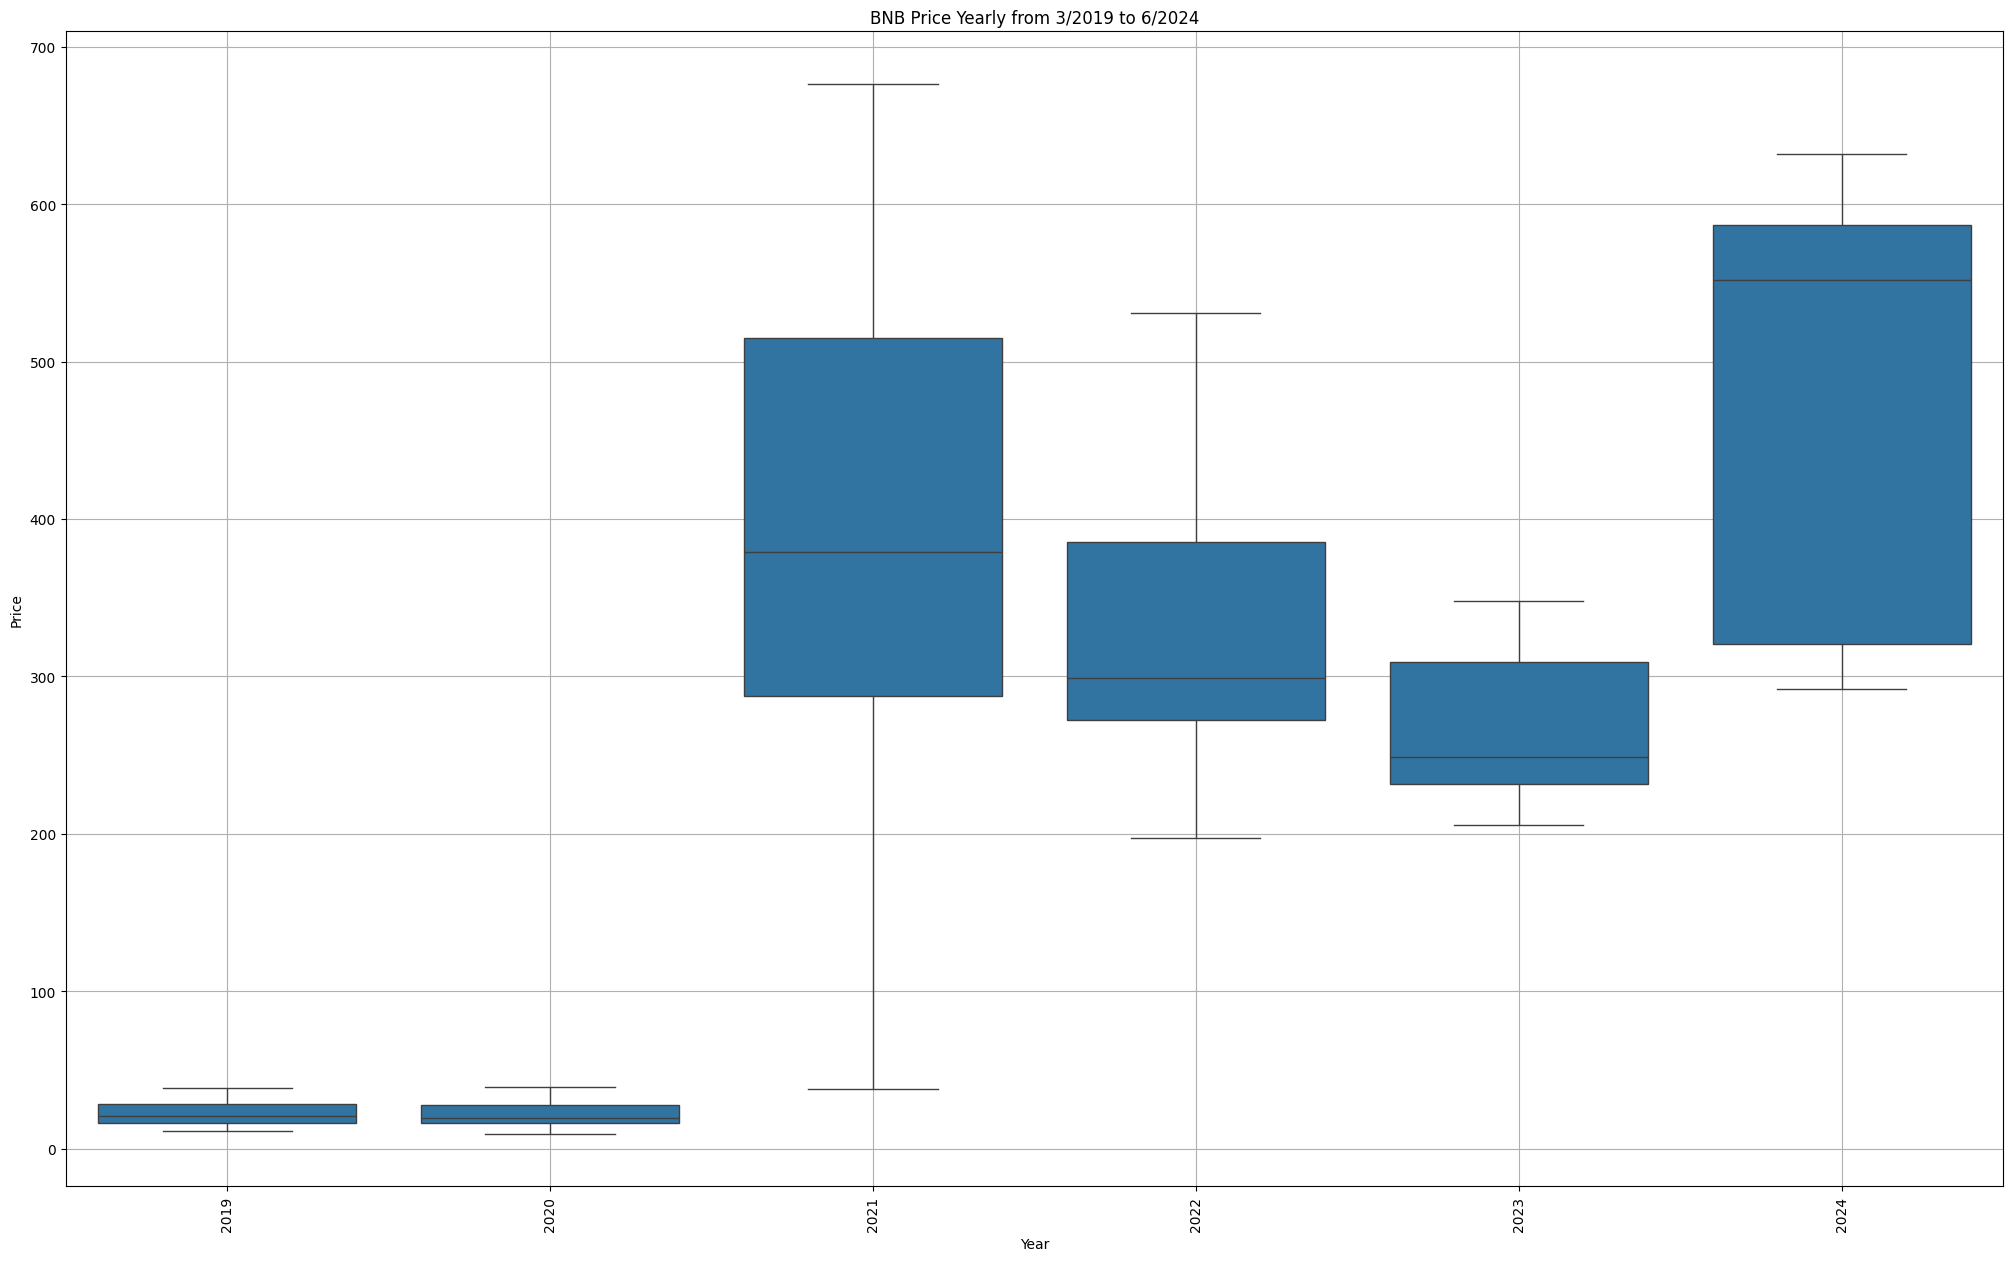

In [9]:
# Create a boxplot of the BNB prices by year
import seaborn as sns
plt.figure(figsize=(25,15))
sns.boxplot(x=data_bnb.index.year, y=data_bnb.values[:,0])
plt.title('BNB Price Yearly from 3/2019 to 6/2024')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [10]:
# Show summary statistics of the BNB prices
print("Summary statistics of BNB prices:\n", data_bnb.describe())

Summary statistics of BNB prices:
              Price
count  1920.000000
mean    229.552547
std     184.430107
min       9.250000
25%      27.030000
50%     247.550000
75%     332.110000
max     676.560000


C:\Users\LEGION\AppData\Local\Temp\ipykernel_25132\3717534691.py:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  data_bnb_yearly_sum = data_bnb.resample('A').mean()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_25132\3717534691.py:9: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  data_bnb_quarterly_sum = data_bnb.resample('Q').mean()


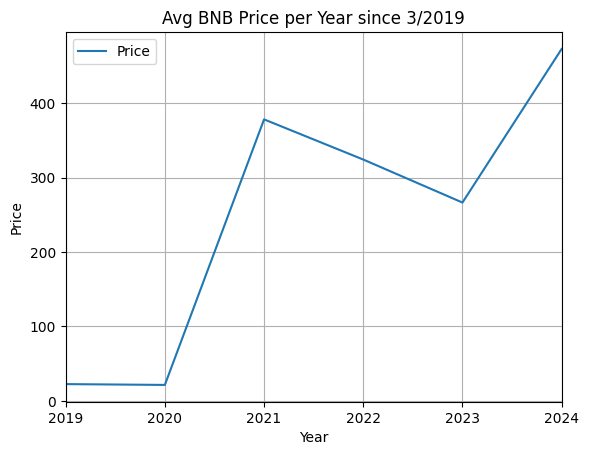

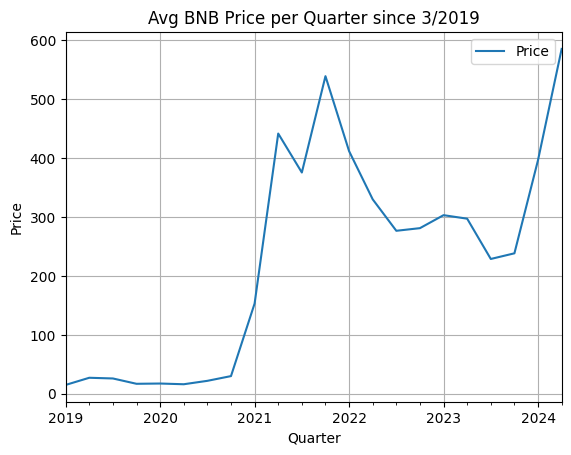

In [12]:
# Create yearly, quarterly, and decade summaries of the data
data_bnb_yearly_sum = data_bnb.resample('A').mean()
data_bnb_yearly_sum.plot()
plt.title('Avg BNB Price per Year since 3/2019')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid()

data_bnb_quarterly_sum = data_bnb.resample('Q').mean()
data_bnb_quarterly_sum.plot()
plt.title('Avg BNB Price per Quarter since 3/2019')
plt.xlabel('Quarter')
plt.ylabel('Price')
plt.grid()


The first few rows of the coefficient of variation data:
            Mean         Std  Cov_pct
Date                                 
2019   22.438007    6.814744    30.37
2020   21.340246    6.274417    29.40
2021  378.274822  169.182451    44.72
2022  324.283726   71.479116    22.04
2023  266.480521   41.951989    15.74


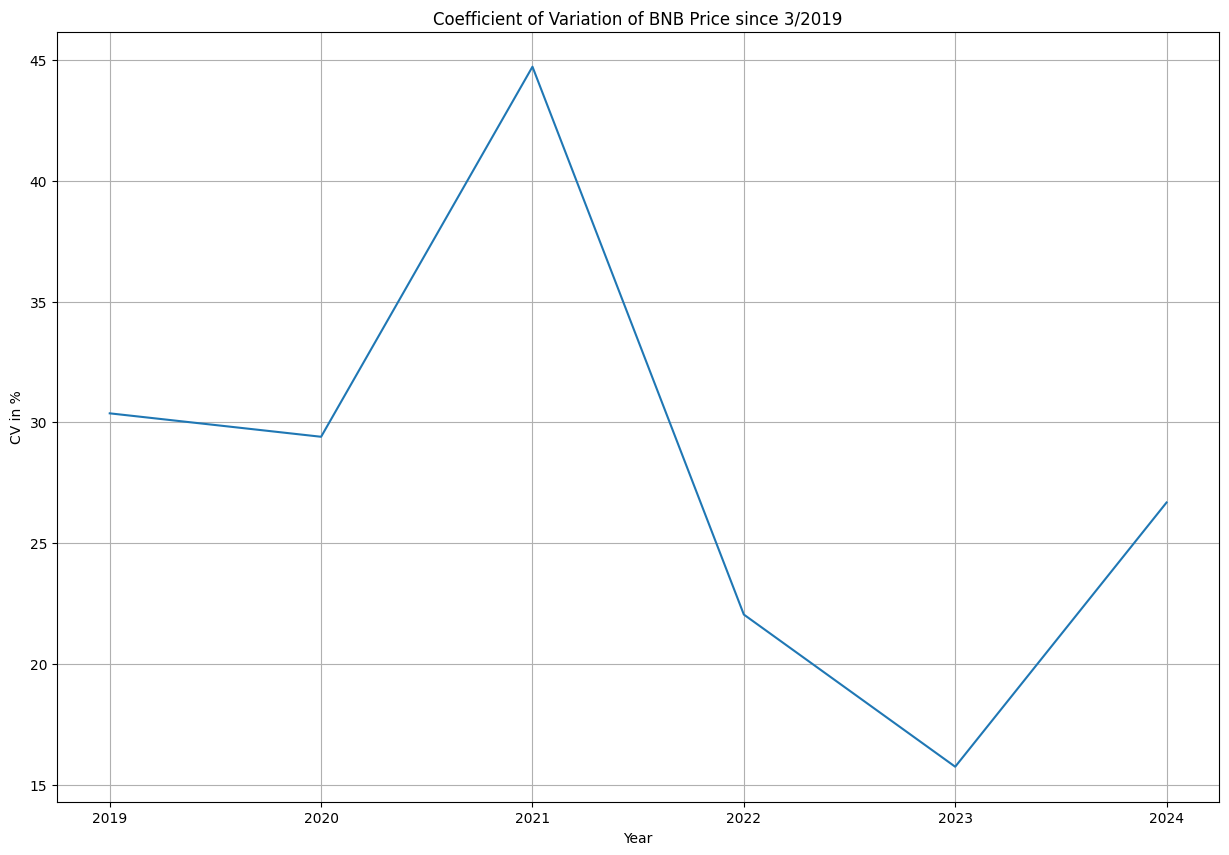

In [13]:
# Calculate the mean, standard deviation, and coefficient of variation (CV) for the data by year
data_bnb_1 = data_bnb.groupby(data_bnb.index.year).mean().rename(columns={'Price':'Mean'})
data_bnb_1 = data_bnb_1.merge(data_bnb.groupby(data_bnb.index.year).std().rename(columns={'Price':'Std'}), left_index=True, right_index=True)
data_bnb_1['Cov_pct'] = ((data_bnb_1['Std'] / data_bnb_1['Mean']) * 100).round(2)

# Plot the CV over time
fig, ax = plt.subplots(figsize=(15, 10))
data_bnb_1['Cov_pct'].plot()
plt.title('Coefficient of Variation of BNB Price since 3/2019')
plt.xlabel('Year')
plt.ylabel('CV in %')
plt.grid()

# Display the first few rows of the data
print('The first few rows of the coefficient of variation data:')
print(data_bnb_1.head())